In [21]:
import pandas as pd
import numpy as np
from snownlp import SnowNLP
import time
import datetime
import json
from PIL import Image
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim import corpora, models
import csv
from sklearn.feature_extraction.text import  CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.feature_extraction.text import  TfidfVectorizer
import matplotlib.pyplot as plt
import re
import jieba

In [22]:
datav1 = pd.read_excel("data.xlsx")
datav1['year'] = datav1['date'].apply(lambda x:int(x[0:4]))
datav1['month'] = datav1['date'].apply(lambda x:int(x[5:7]))
#print(datav1['year'])
datav1['date'] = pd.to_datetime(datav1['date'])
datav1

,date,content,year,month
0,2022-01-23 21:00:00,救大命🆘 被隔离在家，来送物资的社区志愿者竟然是前男友,2022,1
1,2022-01-23 21:00:00,求b占up主推荐,2022,1
2,2022-01-23 21:00:00,希望延迟开学(别骂我,2022,1
3,2022-01-23 21:00:00,求求学校领导加强宣传吧……今天竟然和一个华科的同学争，人大到底是不是第二梯队😢,2022,1
4,2022-01-23 21:00:00,无大语，我爸觉得只要坐在电脑前就是在玩电脑，可是我是学计算机的呀😅,2022,1
...,...,...,...,...
4188,2022-01-31 21:00:00,想试着考年后的教资，年后复习来的急吗,2022,1
4189,2022-01-31 21:00:00,你觉得仪式感有必要吗？,2022,1
4190,2022-01-31 21:00:00,一想到马上要给导师发新年祝福就紧张,2022,1
4191,2022-01-31 21:00:00,蓓思的电容笔真的好用吗？跟ap比起来哪个性价比更高？,2022,1


In [23]:
datav2 = datav1[datav1.year == 2022]
datav2.dropna(inplace=True)
datav2.sort_values(by='date',inplace=True)
datav2.drop_duplicates(inplace=True)
datav2

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,date,content,year,month
3413,2022-01-02 21:00:00,姐妹们是什么罩杯？,2022,1
3403,2022-01-02 21:00:00,这两天就总是挥之不去的想法，可能是看到了高中现在在清北的同学他们好快乐啊，我总告诉自己人大也...,2022,1
3404,2022-01-02 21:00:00,求问高仰光老师的外国法制史怎么复习，是复习他发的PPT还是他上课讲的PPT呀？感觉他发出来的...,2022,1
3405,2022-01-02 21:00:00,秦聪老师真的超级无敌好！,2022,1
3406,2022-01-02 21:00:00,请问下学期转专业的话这学期期末考试考得很差影响大吗？谢谢🙏,2022,1
...,...,...,...,...
1108,2022-05-11 18:57:00,想知道校内理发店自带染发剂不漂发染发需要收多少的手工费,2022,5
1118,2022-05-11 18:57:00,啊，纯爱战士暴怒💢，NTR达咩！,2022,5
1081,2022-05-11 18:57:00,想问问大学生心理健康期末闭卷怎么考捏。老师不发ppt,2022,5
2576,2022-05-13 23:26:00,参与方式,2022,5


In [24]:
stopwordlist = []
with open(r"stopwords.txt",'r',encoding="UTF-8") as f:
    for i in f:
        stopwordlist.append(i.strip())
#print(stopwordlist)

In [25]:
def sent2word(line):
    #segList = jieba.cut(line,cut_all=False)
    segList =  SnowNLP(line).keywords()
    segSentence = ''
    for word in segList:
        if word in stopwordlist:
            continue
        if word != '\t' and len(word)>1:
            segSentence += word + " "
    return segSentence.strip()
datav2['words'] = datav2['content'].apply(sent2word)
datav2.dropna(axis=0,how='any',inplace=True)
datav2.to_csv('datav2.csv')
datav2

C:\Users\DELL\AppData\Local\Temp/ipykernel_3692/3605912126.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datav2['words'] = datav2['content'].apply(sent2word)
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,date,content,year,month,words
3413,2022-01-02 21:00:00,姐妹们是什么罩杯？,2022,1,姐妹
3403,2022-01-02 21:00:00,这两天就总是挥之不去的想法，可能是看到了高中现在在清北的同学他们好快乐啊，我总告诉自己人大也...,2022,1,资源 专注
3404,2022-01-02 21:00:00,求问高仰光老师的外国法制史怎么复习，是复习他发的PPT还是他上课讲的PPT呀？感觉他发出来的...,2022,1,PPT 复习 老师 外国
3405,2022-01-02 21:00:00,秦聪老师真的超级无敌好！,2022,1,超级 老师 无敌
3406,2022-01-02 21:00:00,请问下学期转专业的话这学期期末考试考得很差影响大吗？谢谢🙏,2022,1,学期 考试 专业
...,...,...,...,...,...
1108,2022-05-11 18:57:00,想知道校内理发店自带染发剂不漂发染发需要收多少的手工费,2022,5,染发剂
1118,2022-05-11 18:57:00,啊，纯爱战士暴怒💢，NTR达咩！,2022,5,战士
1081,2022-05-11 18:57:00,想问问大学生心理健康期末闭卷怎么考捏。老师不发ppt,2022,5,健康 心理 期末 大学生 闭卷
2576,2022-05-13 23:26:00,参与方式,2022,5,方式 参与


#### 词频
#### 词云
#### 聚类
#### LDA/topic

In [26]:
dict = {}
words = datav2['words'].apply(lambda x:jieba.cut(x,cut_all=False))
for line in words:
    for word in line:
        if word in dict.keys():
            dict[word]=dict[word]+1
        else:
            dict[word]=1
w_order=sorted(dict.items(),key=lambda x:x[1],reverse=True)    

w_order10=w_order[:10]#将列表的前十位提取并且遍历 输出key(单词)和values(次数)
for key,values in w_order10:
    print(key,':',values)     

  : 3362
老师 : 92
朋友 : 74
人大 : 69
喜欢 : 56
推荐 : 53
学校 : 52
同学 : 39
uu : 32
的 : 29


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:492: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:492: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTA

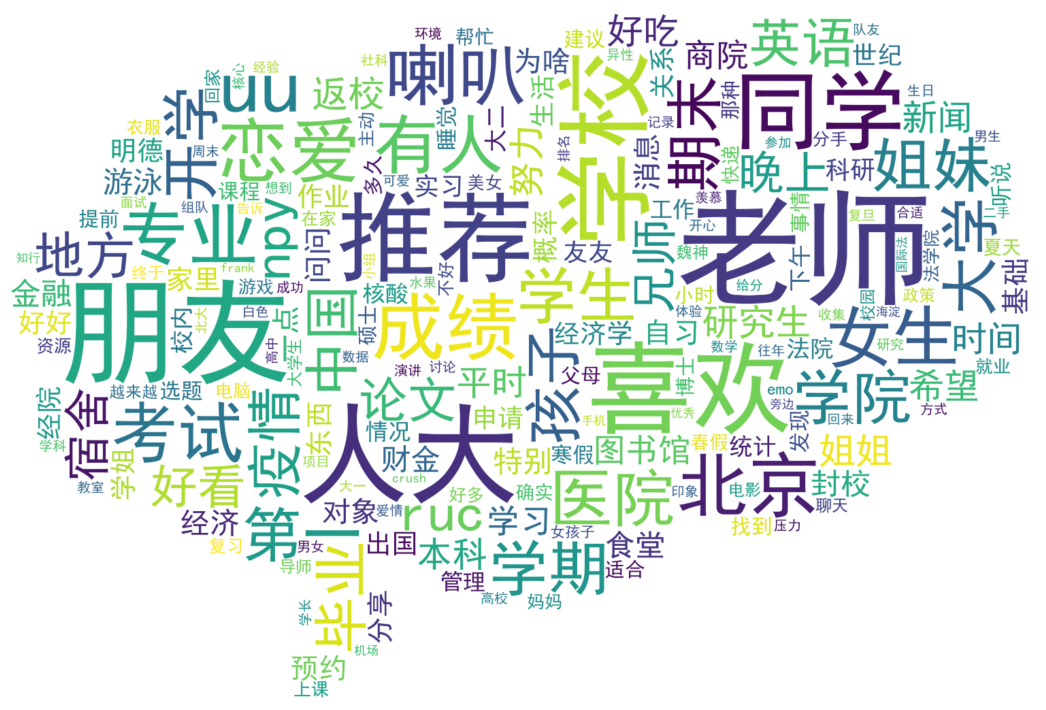

<Figure size 432x288 with 0 Axes>

In [27]:
words = list(datav2['words'])
text = ' '.join(words)
test_mask = np.array(Image.open('./mask.jpg'))
stopwords = set(STOPWORDS)
stopwords.add("said")

#cloud_words
wc = WordCloud(background_color="white", max_words=200, mask=test_mask,font_path='simhei.ttf',
        stopwords=stopwords)
# generate word cloud
wc.generate(text)
 
# plot and show
plt.figure(figsize=(19.6,12.8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()
 
# store to file
wc.to_file("test.png")

In [28]:
# 该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = CountVectorizer(max_features=20000)
# 该类会统计每个词语的tf-idf权值
tf_idf_transformer = TfidfTransformer()
# 将文本转为词频矩阵并计算tf-idf
tfidf = tf_idf_transformer.fit_transform(vectorizer.fit_transform(datav2['words']))
# 获取词袋模型中的所有词语
tfidf_matrix = tfidf.toarray()
# 获取词袋模型中的所有词语
word = vectorizer.get_feature_names()
#print(word)

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
from sklearn.cluster import KMeans
num_clusters = 10
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf)

clusters = km.labels_.tolist()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
print(vectorizer.get_stop_words())
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

None
Cluster 0: 朋友 二手 异性 找到 确实 在家 苹果 笔记本 npy 她出
Cluster 1: 成绩 努力 平时 江平 26 topea 科目 党校 朋友 不好
Cluster 2: 同学 老师 商院 上个月 情谊 英国 wzy 山东 名字 tope
Cluster 3: 推荐 好吃 好看 自学 电影 朋友 姐妹 电脑 北京 男士
Cluster 4: 老师 平时 期末 概率 uu 魏神 spss frank 有人 帮忙
Cluster 5: 兄师 问师 的入 交换 法院 商学院 底下 专硕 打算 有师
Cluster 6: 喜欢 学校 恋爱 喇叭 女生 uu 考试 专业 北京 医院
Cluster 7: 礼物 吃饭 朋友 开销 生日 支付 清真 特别 微信 餐厅
Cluster 8: 封校 全员 明天 感到 返校 有涩 北京 开个 记录 歌唱
Cluster 9: 人大 睡觉 分享 信院 本科 学生 朋友 金融 排名 高金


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
datav2.dropna(inplace = True)
datav2['words'].to_csv('ouput.csv',index=False,header=0)

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [31]:
PATH = "ouput.csv"
 
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  #一行行的读取内容
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
#print(data_set)
dictionary = corpora.Dictionary(data_set)  # 构建 document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
 
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes = 10,random_state=1)
topic_list=lda.print_topics()
print(topic_list)
 
result_list =[]
for i in lda.get_document_topics(corpus)[:]:
    listj=[]
    for j in i:
        listj.append(j[1])
    bz=listj.index(max(listj))
    result_list.append(i[bz][0])
#print(result_list)
for topic in lda.print_topics(num_topics=10):
    termNumber = topic[0]
    print(topic[0], ':', sep='')
    listOfTerms = topic[1].split('+')
    for term in listOfTerms:
        listItems = term.split('*')
        print('  ', listItems[1], '(', listItems[0], ')', sep='')
datav2['result'] = result_list[:-1]
datav2

[(0, '0.055*"老师" + 0.051*"学校" + 0.045*"同学" + 0.014*"经济学" + 0.013*"选题" + 0.011*"人均" + 0.010*"事情" + 0.010*"主动" + 0.009*"想到" + 0.009*"环境"'), (1, '0.018*"努力" + 0.016*"经济" + 0.014*"uu" + 0.013*"兴趣" + 0.012*"好看" + 0.011*"财金" + 0.011*"对象" + 0.011*"帮忙" + 0.011*"中国" + 0.010*"可爱"'), (2, '0.071*"朋友" + 0.066*"喜欢" + 0.020*"论文" + 0.019*"孩子" + 0.018*"时间" + 0.017*"毕业" + 0.014*"学生" + 0.013*"下载" + 0.011*"睡觉" + 0.010*"参加"'), (3, '0.040*"恋爱" + 0.015*"返校" + 0.015*"姐妹" + 0.014*"学院" + 0.013*"大学" + 0.012*"消息" + 0.012*"新闻" + 0.012*"晚上" + 0.011*"开学" + 0.010*"数据"'), (4, '0.022*"希望" + 0.019*"第一" + 0.017*"期末" + 0.014*"建议" + 0.013*"高校" + 0.011*"法律" + 0.011*"理发店" + 0.010*"小时" + 0.009*"北京" + 0.008*"男生"'), (5, '0.021*"宿舍" + 0.019*"npy" + 0.018*"学校" + 0.014*"特别" + 0.014*"五一" + 0.013*"明德" + 0.011*"体验" + 0.010*"啊啊" + 0.009*"uu" + 0.009*"专项"'), (6, '0.074*"人大" + 0.040*"推荐" + 0.018*"北京" + 0.016*"兄师" + 0.016*"封校" + 0.013*"金融" + 0.011*"多久" + 0.011*"本科" + 0.011*"疫情" + 0.010*"大学生"'), (7, '0.165*"""" + 0.029*"专业" + 0.022*"女生" +

C:\Users\DELL\AppData\Local\Temp/ipykernel_3692/530438176.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datav2['result'] = result_list[:-1]


,date,content,year,month,words,result
3413,2022-01-02 21:00:00,姐妹们是什么罩杯？,2022,1,姐妹,3
3403,2022-01-02 21:00:00,这两天就总是挥之不去的想法，可能是看到了高中现在在清北的同学他们好快乐啊，我总告诉自己人大也...,2022,1,资源 专注,3
3404,2022-01-02 21:00:00,求问高仰光老师的外国法制史怎么复习，是复习他发的PPT还是他上课讲的PPT呀？感觉他发出来的...,2022,1,PPT 复习 老师 外国,3
3405,2022-01-02 21:00:00,秦聪老师真的超级无敌好！,2022,1,超级 老师 无敌,2
3406,2022-01-02 21:00:00,请问下学期转专业的话这学期期末考试考得很差影响大吗？谢谢🙏,2022,1,学期 考试 专业,8
...,...,...,...,...,...,...
1108,2022-05-11 18:57:00,想知道校内理发店自带染发剂不漂发染发需要收多少的手工费,2022,5,染发剂,4
1118,2022-05-11 18:57:00,啊，纯爱战士暴怒💢，NTR达咩！,2022,5,战士,1
1081,2022-05-11 18:57:00,想问问大学生心理健康期末闭卷怎么考捏。老师不发ppt,2022,5,健康 心理 期末 大学生 闭卷,6
2576,2022-05-13 23:26:00,参与方式,2022,5,方式 参与,9


In [32]:
from pyLDAvis import gensim
import pyLDAvis
pyLDAvis.enable_notebook()

'''
lda: 计算好的话题模型

corpus: 文档词频矩阵

dictionary: 词语空间
'''
d = gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(d)
pyLDAvis.save_html(d, 'lda.html')

c:\Program Files\Python39\lib\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


In [33]:
df1 = datav2.groupby('month').count()
df1

,date,content,year,words,result
month,,,,,
1,610,610,610,610,610
2,398,398,398,398,398
3,684,684,684,684,684
4,658,658,658,658,658
5,108,108,108,108,108


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

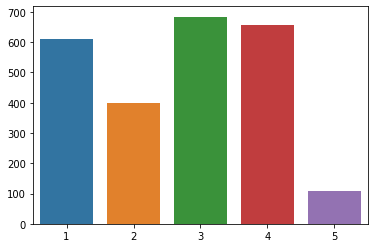

In [34]:
import seaborn as sns
month = [1,2,3,4,5]
num = [610,398,684,658,108]
sns.barplot(month,num)

##### 时间序列做吧

Text(0.5, 1.0, 'month_all')

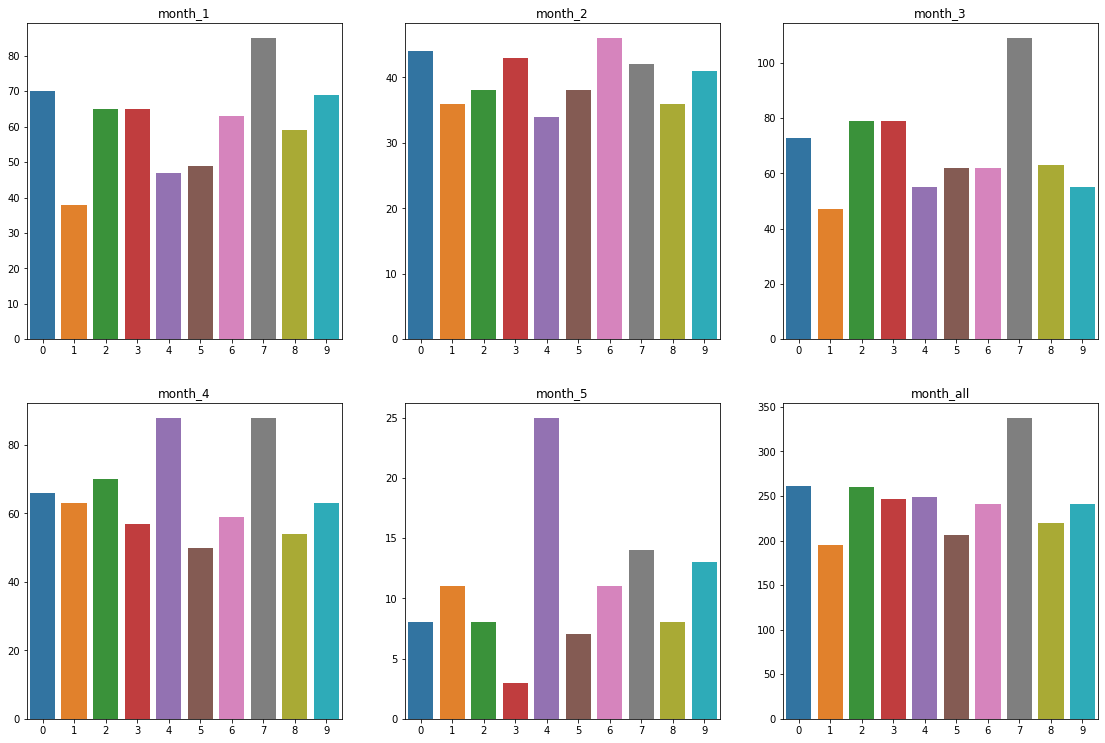

In [35]:
fig,ax = plt.subplots(2,3,figsize = (19.2, 12.8))
ax1 = sns.barplot(y=datav2[datav2.month==1]['result'].value_counts().values, x=datav2[datav2.month==1]['result'].value_counts().index,ax = ax[0][0])
ax2 = sns.barplot(y=datav2[datav2.month==2]['result'].value_counts().values, x=datav2[datav2.month==2]['result'].value_counts().index,ax = ax[0][1])
ax3 = sns.barplot(y=datav2[datav2.month==3]['result'].value_counts().values, x=datav2[datav2.month==3]['result'].value_counts().index,ax = ax[0][2])
ax4 = sns.barplot(y=datav2[datav2.month==4]['result'].value_counts().values, x=datav2[datav2.month==4]['result'].value_counts().index,ax = ax[1][0])
ax5 = sns.barplot(y=datav2[datav2.month==5]['result'].value_counts().values, x=datav2[datav2.month==5]['result'].value_counts().index,ax = ax[1][1])
ax6 = sns.barplot(y=datav2['result'].value_counts().values, x=datav2['result'].value_counts().index,ax = ax[1][2])
ax1.set_title('month_1')
ax2.set_title('month_2')
ax3.set_title('month_3')
ax4.set_title('month_4')
ax5.set_title('month_5')
ax6.set_title('month_all')

##### month_1

In [36]:
for i in range(1,6):
    print('month'+str(i))
    df = datav2[datav2.month==i]
    PATH = 'ouput_month+'+str(i)+'.csv'
    df['words'].to_csv('ouput.csv',index=False,header=0)

month1
month2
month3
month4
month5


In [37]:
PATH = 'ouput_month+'+str(1)+'.csv'
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  #一行行的读取内容
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
#print(data_set)
dictionary = corpora.Dictionary(data_set)  # 构建 document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
 
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes = 30,random_state=1)
topic_list=lda.print_topics()
print(topic_list)
 
result_list =[]
for i in lda.get_document_topics(corpus)[:]:
    listj=[]
    for j in i:
        listj.append(j[1])
    bz=listj.index(max(listj))
    result_list.append(i[bz][0])
#print(result_list)
for topic in lda.print_topics(num_topics=10):
    termNumber = topic[0]
    print(topic[0], ':', sep='')
    listOfTerms = topic[1].split('+')
    for term in listOfTerms:
        listItems = term.split('*')
        print('  ', listItems[1], '(', listItems[0], ')', sep='')

d = gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(d)
pyLDAvis.save_html(d, 'lda_month'+str(1)+'.html')        

[(0, '0.009*"难受" + 0.007*"老师" + 0.006*"工作" + 0.006*"考研" + 0.006*"出国" + 0.006*"父母" + 0.005*"学生" + 0.005*"呜呜" + 0.005*"复习" + 0.005*"规矩"'), (1, '0.010*"老师" + 0.009*"真的" + 0.009*"希望" + 0.009*"人大" + 0.009*"成绩" + 0.007*"绩点" + 0.007*"有没有" + 0.006*"推荐" + 0.006*"学校" + 0.005*"建议"'), (2, '0.009*"平时" + 0.009*"真的" + 0.007*"喜欢" + 0.007*"推荐" + 0.005*"老师" + 0.005*"有人" + 0.005*"成绩" + 0.005*"保研" + 0.005*"期末" + 0.005*"作业"'), (3, '0.021*"真的" + 0.014*"喜欢" + 0.013*"人大" + 0.012*"呜呜" + 0.011*"老师" + 0.006*"法学院" + 0.005*"请问" + 0.005*"有没有" + 0.005*"寒假" + 0.005*"同学"'), (4, '0.009*"npy" + 0.008*"绩点" + 0.008*"视频" + 0.006*"学期" + 0.006*"问问" + 0.006*"研究生" + 0.006*"在家" + 0.006*"老师" + 0.006*"男朋友" + 0.005*"期末"'), (5, '0.010*"女朋友" + 0.010*"老师" + 0.008*"推荐" + 0.008*"喜欢" + 0.008*"真的" + 0.007*"朋友" + 0.007*"前女友" + 0.006*"考研" + 0.006*"有没有" + 0.006*"求问"'), (6, '0.011*"真的" + 0.006*"概率论" + 0.006*"学习" + 0.005*"大学" + 0.005*"同学" + 0.005*"位置" + 0.005*"在家" + 0.005*"女性" + 0.005*"绩点" + 0.005*"选题"'), (7, '0.027*"真的" + 0.016*"老师" + 0.015*

c:\Program Files\Python39\lib\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


In [38]:
PATH = 'ouput_month+'+str(2)+'.csv'
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  #一行行的读取内容
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
#print(data_set)
dictionary = corpora.Dictionary(data_set)  # 构建 document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
 
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes = 30,random_state=1)
topic_list=lda.print_topics()
print(topic_list)
 
result_list =[]
for i in lda.get_document_topics(corpus)[:]:
    listj=[]
    for j in i:
        listj.append(j[1])
    bz=listj.index(max(listj))
    result_list.append(i[bz][0])
#print(result_list)
for topic in lda.print_topics(num_topics=10):
    termNumber = topic[0]
    print(topic[0], ':', sep='')
    listOfTerms = topic[1].split('+')
    for term in listOfTerms:
        listItems = term.split('*')
        print('  ', listItems[1], '(', listItems[0], ')', sep='')

d = gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(d)
pyLDAvis.save_html(d, 'lda_month'+str(2)+'.html')        

[(0, '0.016*"学校" + 0.011*"家里" + 0.009*"女生" + 0.009*"喜欢" + 0.007*"返校" + 0.007*"外婆" + 0.007*"请问" + 0.005*"uu" + 0.005*"北京" + 0.005*"问下"'), (1, '0.015*"预约" + 0.014*"谢谢" + 0.014*"开学" + 0.010*"友友" + 0.009*"人大" + 0.009*"请问" + 0.008*"生活" + 0.008*"uu" + 0.006*"真的" + 0.006*"感觉"'), (2, '0.012*"绩点" + 0.012*"有人" + 0.012*"宿舍" + 0.009*"求问" + 0.009*"喜欢" + 0.006*"开学" + 0.006*"印象" + 0.006*"肥肠" + 0.006*"人大" + 0.006*"基础"'), (3, '0.011*"有没有" + 0.011*"推荐" + 0.011*"同学" + 0.011*"学校" + 0.009*"师兄" + 0.009*"师姐" + 0.007*"人大" + 0.007*"学期" + 0.007*"英语" + 0.007*"北京"'), (4, '0.011*"真的" + 0.011*"老师" + 0.009*"研究生" + 0.009*"朋友" + 0.009*"纠结" + 0.006*"一年" + 0.006*"结项" + 0.006*"学校" + 0.004*"北京" + 0.004*"那种"'), (5, '0.012*"人大" + 0.012*"学校" + 0.010*"同学" + 0.010*"专业" + 0.010*"朋友" + 0.010*"实习" + 0.008*"证明" + 0.008*"呜呜" + 0.008*"数学" + 0.006*"论文"'), (6, '0.014*"uu" + 0.008*"寒假" + 0.008*"辅修" + 0.008*"学校" + 0.006*"中国" + 0.006*"返校" + 0.006*"街巷" + 0.006*"申请" + 0.006*"专业" + 0.006*"提前"'), (7, '0.010*"人大" + 0.010*"呜呜" + 0.010*"成绩" + 0

In [39]:
PATH = 'ouput_month+'+str(3)+'.csv'
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  #一行行的读取内容
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
#print(data_set)
dictionary = corpora.Dictionary(data_set)  # 构建 document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
 
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes = 30,random_state=1)
topic_list=lda.print_topics()
print(topic_list)
 
result_list =[]
for i in lda.get_document_topics(corpus)[:]:
    listj=[]
    for j in i:
        listj.append(j[1])
    bz=listj.index(max(listj))
    result_list.append(i[bz][0])
#print(result_list)
for topic in lda.print_topics(num_topics=10):
    termNumber = topic[0]
    print(topic[0], ':', sep='')
    listOfTerms = topic[1].split('+')
    for term in listOfTerms:
        listItems = term.split('*')
        print('  ', listItems[1], '(', listItems[0], ')', sep='')

d = gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(d)
pyLDAvis.save_html(d, 'lda_month'+str(3)+'.html')        

[(0, '0.012*"感觉" + 0.010*"封校" + 0.009*"学校" + 0.009*"同学" + 0.005*"真的" + 0.005*"一点" + 0.005*"宿舍" + 0.005*"请问" + 0.004*"好多" + 0.004*"孩子"'), (1, '0.010*"老师" + 0.008*"同学" + 0.008*"求问" + 0.007*"北京" + 0.007*"推荐" + 0.007*"学校" + 0.005*"请问" + 0.005*"有人" + 0.005*"宿舍" + 0.005*"审批"'), (2, '0.010*"真的" + 0.009*"疫情" + 0.006*"学校" + 0.006*"出入" + 0.005*"喜欢" + 0.005*"审批" + 0.005*"求问" + 0.005*"时间" + 0.005*"有没有" + 0.005*"师姐"'), (3, '0.011*"感觉" + 0.010*"老师" + 0.009*"同学" + 0.008*"人大" + 0.008*"真的" + 0.006*"谢谢" + 0.006*"时间" + 0.005*"ruc" + 0.005*"学校" + 0.005*"呜呜"'), (4, '0.016*"学校" + 0.013*"疫情" + 0.009*"请问" + 0.005*"uu" + 0.005*"食堂" + 0.005*"审批" + 0.005*"预约" + 0.004*"封校" + 0.004*"有没有" + 0.004*"游泳"'), (5, '0.015*"女生" + 0.013*"男生" + 0.007*"有没有" + 0.007*"真的" + 0.006*"人大" + 0.006*"感觉" + 0.004*"有人" + 0.004*"事情" + 0.004*"说话" + 0.004*"鸳鸯"'), (6, '0.022*"喜欢" + 0.010*"奶奶" + 0.009*"人大" + 0.006*"朋友" + 0.006*"萝卜" + 0.006*"回来" + 0.004*"呜呜" + 0.004*"几个" + 0.004*"多人" + 0.004*"好看"'), (7, '0.007*"女生" + 0.007*"通知" + 0.007*"出轨" +

In [40]:
PATH = 'ouput_month+'+str(4)+'.csv'
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  #一行行的读取内容
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
#print(data_set)
dictionary = corpora.Dictionary(data_set)  # 构建 document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
 
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes = 30,random_state=1)
topic_list=lda.print_topics()
print(topic_list)
 
result_list =[]
for i in lda.get_document_topics(corpus)[:]:
    listj=[]
    for j in i:
        listj.append(j[1])
    bz=listj.index(max(listj))
    result_list.append(i[bz][0])
#print(result_list)
for topic in lda.print_topics(num_topics=10):
    termNumber = topic[0]
    print(topic[0], ':', sep='')
    listOfTerms = topic[1].split('+')
    for term in listOfTerms:
        listItems = term.split('*')
        print('  ', listItems[1], '(', listItems[0], ')', sep='')

d = gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(d)
pyLDAvis.save_html(d, 'lda_month'+str(4)+'.html')        

[(0, '0.013*"人大" + 0.006*"女朋友" + 0.006*"有人" + 0.006*"请问" + 0.005*"出去玩" + 0.005*"大创" + 0.003*"财金" + 0.003*"英语" + 0.003*"想法" + 0.003*"宿舍"'), (1, '0.008*"感觉" + 0.006*"男朋友" + 0.006*"有没有" + 0.006*"喜欢" + 0.006*"女性" + 0.004*"专业" + 0.004*"那种" + 0.004*"女生" + 0.004*"爱情" + 0.003*"自信"'), (2, '0.015*"感觉" + 0.012*"人大" + 0.006*"求问" + 0.006*"师姐" + 0.006*"真的" + 0.005*"推荐" + 0.005*"请问" + 0.005*"师兄" + 0.005*"喜欢" + 0.004*"男生"'), (3, '0.013*"喜欢" + 0.012*"男生" + 0.008*"朋友" + 0.007*"uu" + 0.006*"女生" + 0.006*"专业" + 0.006*"人大" + 0.005*"商院" + 0.005*"那种" + 0.005*"软科"'), (4, '0.023*"女生" + 0.019*"男生" + 0.018*"真的" + 0.015*"谈恋爱" + 0.014*"春假" + 0.014*"北京" + 0.012*"不想" + 0.011*"颜值" + 0.010*"能力" + 0.009*"我要"'), (5, '0.009*"真的" + 0.008*"感觉" + 0.007*"睡觉" + 0.006*"喜欢" + 0.006*"有没有" + 0.005*"好好" + 0.005*"朋友" + 0.004*"男生" + 0.004*"担心" + 0.004*"谢谢"'), (6, '0.025*"喜欢" + 0.017*"真的" + 0.007*"老师" + 0.006*"求问" + 0.005*"聊天" + 0.005*"师姐" + 0.005*"山东" + 0.004*"......" + 0.004*"谈恋爱" + 0.004*"主动"'), (7, '0.010*"感觉" + 0.008*"女朋友" + 0.00

In [41]:
PATH = 'ouput_month+'+str(5)+'.csv'
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  #一行行的读取内容
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
#print(data_set)
dictionary = corpora.Dictionary(data_set)  # 构建 document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
 
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes = 30,random_state=1)
topic_list=lda.print_topics()
print(topic_list)
 
result_list =[]
for i in lda.get_document_topics(corpus)[:]:
    listj=[]
    for j in i:
        listj.append(j[1])
    bz=listj.index(max(listj))
    result_list.append(i[bz][0])
#print(result_list)
for topic in lda.print_topics(num_topics=10):
    termNumber = topic[0]
    print(topic[0], ':', sep='')
    listOfTerms = topic[1].split('+')
    for term in listOfTerms:
        listItems = term.split('*')
        print('  ', listItems[1], '(', listItems[0], ')', sep='')

d = gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(d)
pyLDAvis.save_html(d, 'lda_month'+str(5)+'.html')        

[(0, '0.016*"推荐" + 0.016*"水果" + 0.016*"戒指" + 0.008*"学校" + 0.008*"丢失" + 0.008*"校内" + 0.008*"好像" + 0.008*"封校" + 0.008*"哥哥" + 0.008*"室友"'), (1, '0.014*"人大" + 0.014*"专项" + 0.014*"希望" + 0.014*"呜呜" + 0.014*"问问" + 0.007*"上网" + 0.007*"老师" + 0.007*"图书馆" + 0.007*"好像" + 0.007*"室友"'), (2, '0.017*"问问" + 0.009*"校内" + 0.009*"评论" + 0.009*"学校" + 0.009*"理发店" + 0.009*"提交" + 0.009*"重嘛" + 0.009*"失主" + 0.009*"三星" + 0.009*"20.7%"'), (3, '0.020*"学校" + 0.020*"个人所得税" + 0.014*"利息" + 0.014*"股利" + 0.014*"中国" + 0.014*"不想" + 0.014*"实习" + 0.014*"厕所" + 0.007*"参加" + 0.007*"20%"'), (4, '0.015*"图书馆" + 0.015*"作业" + 0.015*"一篇" + 0.015*"预期" + 0.015*"接触" + 0.015*"中文版" + 0.015*"晚上" + 0.008*"期末" + 0.008*"线下" + 0.008*"黑色"'), (5, '0.018*"uu" + 0.018*"蛋糕" + 0.018*"爸爸" + 0.018*"机房" + 0.018*"占座" + 0.018*"下载" + 0.018*"数据" + 0.018*"有偿" + 0.018*"可加" + 0.018*"QQ"'), (6, '0.025*"上课" + 0.017*"周四" + 0.017*"有没有" + 0.017*"焦虑" + 0.017*"好好" + 0.017*"选题" + 0.009*"吃饭" + 0.009*"问问" + 0.009*"老师" + 0.009*"期末"'), (7, '0.021*"同学" + 0.016*"报名" + 0.01

##### 聚类试一试

In [42]:
from sklearn.cluster import KMeans
num_clusters = 10
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf)

clusters = km.labels_.tolist()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
print(vectorizer.get_stop_words())
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

None
Cluster 0: 喜欢 推荐 同学 恋爱 喇叭 女生 北京 uu 医院 姐妹
Cluster 1: 专业 商院 考试 排名 公共 数学 社科 资源 肯定 说统
Cluster 2: 学校 开学 地方 百分制 卷纸 二代 病例 个家 目标 是密
Cluster 3: 人大 睡觉 分享 信院 本科 学生 高金 养老院 密码 压线
Cluster 4: 财金 20zlt 听说 20gwh cdy 上课 出国 yzh 投大 总共
Cluster 5: 朋友 二手 推荐 异性 找到 确实 在家 苹果 笔记本 npy
Cluster 6: 老师 平时 期末 概率 uu 魏神 spss frank 有人 帮忙
Cluster 7: 成绩 努力 平时 江平 26 topea 科目 党校 朋友 不好
Cluster 8: 孩子 救救 项难 控制 会计 可爱 就业 零食 考试 很雷
Cluster 9: 大学 学期 人民 中国 选拔 年级 习惯 小组 收获 商学院


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
for i in range(1,6):
    print('month'+str(i))
    df = datav2[datav2.month==i]
    # 该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频
    vectorizer = CountVectorizer(max_features=20000)
    # 该类会统计每个词语的tf-idf权值
    tf_idf_transformer = TfidfTransformer()
    # 将文本转为词频矩阵并计算tf-idf
    tfidf = tf_idf_transformer.fit_transform(vectorizer.fit_transform(df['words']))
    # 获取词袋模型中的所有词语
    tfidf_matrix = tfidf.toarray()
    # 获取词袋模型中的所有词语
    word = vectorizer.get_feature_names()
    #print(word)
    num_clusters = 10
    km = KMeans(n_clusters=num_clusters)
    km.fit(tfidf)

    clusters = km.labels_.tolist()
    order_centroids = km.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    print(vectorizer.get_stop_words())
    for i in range(num_clusters):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

month1


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


None
Cluster 0: 喜欢 考试 有人 概率 大学 第一 60w 大一 英语 出国
Cluster 1: 成绩 平时 topea 26 江平 努力 复习 查询 政经 新出
Cluster 2: 老师 平时 演讲 概率 出分 同学 敬尧 文萍 业绩 师弟
Cluster 3: 人大 开学 喇叭 恋爱 同学 大二 研究生 孩子 女生 好耶
Cluster 4: 推荐 姐妹 好吃 好看 粉丝 封神 电脑 本命口 yyds 的剧
Cluster 5: 北京 不惯 推荐 拌面 下午 预约 北方 人民 返乡 防疫
Cluster 6: 学期 预习 四门 大学 紧张 她雷 专业 考试 结束 有望
Cluster 7: 期末 老师 这帖 过得去 本来 三四十 入门 概率 揭露 分手
Cluster 8: 新闻 压力 我国 案例 时代 传播 媒体 专业 回忆 图书馆
Cluster 9: 朋友 苹果 笔记本 npy 在家 天天 她出 隔三差五 礼物 收到
month2


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


None
Cluster 0: 中国 专业 小时 第一 寒假 街巷 回来 文化 考试 养生
Cluster 1: 学期 英语 冰壶 大自闭 差想 拓展 体育课 紧跟着 春季 gpa
Cluster 2: 老师 ensign web 社会 影响 平时 永娜 方向 为难 志刚
Cluster 3: 学校 朋友 返校 论文 预约 成绩 毕业 成功 医院 开学
Cluster 4: 推荐 太油 驾校 qaq 3000 好吃 零食 孩子 自学 excel
Cluster 5: uu 打算 返校 可不 假期 时间 方式 组大 广赛 白色
Cluster 6: 面试 岗位 消息 外地 声四郎 填表 填写 基础 培养 城市
Cluster 7: 北京 生源 快递 一家 工资 广州 普通话 外地 填写 友友
Cluster 8: 人大 王者 发送 密码 分享 科目 经院 为啥 知乎 手机
Cluster 9: 喇叭 终于 掉帧 人大小 好久 不见 敢信 回来 地区 地方
month3


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


None
Cluster 0: 人大 游泳 本科 世纪 学院 喇叭 自习 姐妹 讨厌 封校
Cluster 1: 学校 女生 疫情 学生 晚上 孩子 夏天 ruc 地方 20
Cluster 2: 快递 保定 转运 衣服 显示 防空 人民 宏观 学习 经济
Cluster 3: 喜欢 东西 美们 冒险 上管 感受 花束 分享 害怕 没谈
Cluster 4: 跳舞 舞蹈 协调 四肢 地方 大帅 大人 大学 大学生 大小
Cluster 5: 老师 uu 帮忙 值得 中文 需求 小荣 秘密 头发 680
Cluster 6: 同学 上个月 wzy 讨论 百分比 参加 主理 可怜 保证 限度
Cluster 7: 推荐 基础 社科 好吃 姐妹 25 专业 防护 眼镜 资源
Cluster 8: 朋友 找到 美女 说实话 异性 三观 13 情侣 多久 博士生
Cluster 9: 有人 收到 面试 六级 复读 滴受 错误 语义 过斗 洗漱
month4


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


None
Cluster 0: 同学 学校 uu 财金 考试 党校 宿舍 努力 学院 新闻
Cluster 1: 朋友 生气 三四 减肥 勿扰 确实 推荐 外校 生活 希望
Cluster 2: 推荐 专业 ruc 姐姐 npy 毕业 北京 科研 商院 春假
Cluster 3: 老师 魏神 zxy 设计 指导 课堂 会计 个说 第一 想到
Cluster 4: 对象 机会 当面 问想 男女 lzy 发现 父母 商院 同学
Cluster 5: 听说 往年 确实 真题 历史 哲学 专业 培养 外套 大学
Cluster 6: 人大 信院 学生 高金 甘肃 下半年 原神 创出 羽毛球 计划
Cluster 7: 恋爱 成长 留学生 温柔 想到 异性 多久 警察 哥哥 北京
Cluster 8: 喜欢 交友 黏人 女孩 更久 弟弟 类型 出国 男人 孩子
Cluster 9: 女生 春假 生们 universal 能力 伽裤 个个 眼里 忍不住 身材
month5
None
Cluster 0: 方式 是线 电动车 洗澡 疲劳 美女 参与 运动 劝五点 爱情
Cluster 1: 法律 兄师 水果 考试 上课 回答 网球 好好 宿舍 希望
Cluster 2: 二手 朋友 相机 新手 推荐 图片 奥纬 奖学金 夹克 失败
Cluster 3: 学校 电脑 搬家 箱子 理发店 项书 创立 体验 厕所 硬件
Cluster 4: 消息 周四 还线 pyq 计划 住宿 学生 校外 大佬 外围
Cluster 5: 人大 花花 的长 越来越 周年 喇叭 奥纬 奖学金 告诉 夹克
Cluster 6: 返校 让京 暂停 北京市 学生 图片 奥纬 奖学金 夹克 失败
Cluster 7: 下载 帮忙 经济 知网 为啥 论文 3118278385 有意者 提供 免费
Cluster 8: 专项 生不能 奖学金 麻烦 图片 好好 奥纬 夹克 失败 大学生
Cluster 9: 一天到晚 麻烦 图书馆 好好 奥纬 奖学金 夹克 失败 大学生 大佬
